### Requirements

In [3]:
import pandas as pd
import tensorflow as tf
import numpy as np

In [ ]:
# since for computation cost for flair embeddings to entire data is time consuming considered only 10000 samples 

### Read the data

In [4]:
train=pd.read_csv("10000samples_used_for_siamese.csv")   # data is from kaggle competetion having quora question pairs
# test=pd.read_csv("Data/test.csv")

# Data Cleaning 

In [ ]:
import re
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 

stops = set(stopwords.words('english'))

def text_clean(text):
    ''' Pre process and convert texts to a list of words '''
    text = str(text)
    text = text.lower()

    # Clean the text
    text = re.sub(r"[^A-Za-z0-9^,!.\/'+-=]", " ", text)
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "cannot ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r",", " ", text)
    text = re.sub(r"\.", " ", text)
    text = re.sub(r"!", " ! ", text)
    text = re.sub(r"\/", " ", text)
    text = re.sub(r"\^", " ^ ", text)
    text = re.sub(r"\+", " + ", text)
    text = re.sub(r"\-", " - ", text)
    text = re.sub(r"\=", " = ", text)
    text = re.sub(r"'", " ", text)
    text = re.sub(r"(\d+)(k)", r"\g<1>000", text)
    text = re.sub(r":", " : ", text)
    text = re.sub(r" e g ", " eg ", text)
    text = re.sub(r" b g ", " bg ", text)
    text = re.sub(r" u s ", " american ", text)
    text = re.sub(r"\0s", "0", text)
    text = re.sub(r" 9 11 ", "911", text)
    text = re.sub(r"e - mail", "email", text)
    text = re.sub(r"j k", "jk", text)
    text = re.sub(r"\s{2,}", " ", text)

   

    return text

In [ ]:
train['cleaned_question1']=train['question1'].apply(lambda x:text_clean(x))
train['cleaned_question2']=train['question2'].apply(lambda x:text_clean(x))


In [ ]:
len(train)
train['len_q1']=train['cleaned_question1'].apply(lambda x:len(x.split()))  # split by white space and count number of words in question1 per each row
train['len_q2']=train['cleaned_question2'].apply(lambda x:len(x.split()))  # split by white space and count number of words in question2 per each row


In [5]:
train

,id,qid1,qid2,question1,question2,is_duplicate,cleaned_question1,cleaned_question2,len_q1,len_q2
0,101948,168776,134429,How can one live life to the fullest?,How do I can live my life to the fullest?,1,how can one live life to the fullest,how do i can live my life to the fullest,8,10
1,88938,17291,149509,Which are the safest cities in India?,Why is India so dirty? How can we improve?,0,which are the safest cities in india,why is india so dirty how can we improve,7,9
2,60696,106107,106108,What were the best high school memories for you?,What is your high school beautiful memories?,1,what were the best high school memories for you,what is your high school beautiful memories,9,7
3,58906,103268,103269,What will happen to Syria after war?,What is happening in Syria?,0,what will happen to syria after war,what is happening in syria,7,5
4,254500,3623,38385,How can I see who viewed my Instagram video?,How can you tell who has viewed Instagram videos?,1,how can i see who viewed my instagram video,how can you tell who has viewed instagram videos,9,9
5,10574,20473,20474,Kirchoff's first law and second law?,What is kirchoff's law?,0,kirchoff first law and second law,what is kirchoff law,6,4
6,187978,245201,286367,How does astrology work?,How does astrology work? What are its basics?,1,how does astrology work,how does astrology work what are its basics,4,8
7,140347,223043,223044,How has 2016 been as a year in your life?,How was the year 2016 for you?,1,how has 2016 been as a year in your life,how was the year 2016 for you,10,7
8,111504,182618,182619,How can I increase my concentration?,How should I increase my concentration and con...,0,how can i increase my concentration,how should i increase my concentration and con...,6,8
9,30422,11174,47949,How could we know that we are falling in love?,How do know when you're in love?,1,how could we know that we are falling in love,how do know when you are in love,10,8


In [7]:
# import matplotlib.pyplot as plot
# train['len_q1'].plot(kind="hist")   # after plotting the plot max length of words overall data is found to be 12

In [8]:
# train=train[(train['len_q1']<=10) & (train['len_q2']<=10)]  # keep max 10 words in question1
# train=train[(train['len_q1']>=2) & (train['len_q2']>=2)]  # keep minimum 2 words in question1

In [10]:
train['cleaned_question1'].str.split().str.len().value_counts()# verify once  the length of words should be between 2 to 10

8     2001
7     1949
9     1724
6     1452
10    1393
5      865
4      475
3      138
Name: cleaned_question1, dtype: int64

In [11]:

# train=train.sample(10000) # I only used 10000 samples because I did not have enough memory to use the whole dataset

In [11]:
from flair.embeddings import FlairEmbeddings,Sentence,DocumentPoolEmbeddings   # flair embeddings from flair package

### document embedding from a list of word embeddings.

In [12]:
flair_embedding_forward = FlairEmbeddings('news-forward')
flair_embedding_backward = FlairEmbeddings('news-backward')
document_embeddings_flair = DocumentPoolEmbeddings([
                                              flair_embedding_backward,    # mean for all word embeddings
                                              flair_embedding_forward])  

In [13]:
pad=list(np.zeros(4096,dtype=float))     # zero vector of dimension 4096 as word embeddings are of size 4096 from flair

In [14]:
len(pad)

4096

In [15]:
max_len=12   # max number of words per question on average for overall data  is observed to be 12 

In [16]:
def flair(sen): 
    try:
        emb = []
        # create sentence.
        sentence = Sentence(sen)
        document_embeddings_flair.embed(sentence)   # calculate flair embeddings for the sentence
        for token in sentence:
            emb.append(list(np.array(token.embedding)))  # convert the tensor to array type

        if len(emb) <=max_len :                     # if the embeddings of the sentence is less than maximum length(12)
            num_pads_to_add= max_len- len(emb)    # find out how many words are less to the maximum length
            added_pads=[pad]*num_pads_to_add     # add  pads(zero vector) as words to makeit upto maximum length
            added_pads.extend(emb) 
            sentence = added_pads
            return sentence
        else:
            emb=emb[0:max_len]     # if it is greater than maximum length 
                                   #truncate the words to maximum length
            return emb
    except:
        print(sen,len(sen))    # exception is handled if there is another case where no embeddings are present for the word
    

In [17]:
train['count_'] = train['cleaned_question1'].apply(lambda x: len(x.split()))
train = train[train.count_>2]                                  # ensure more than 2 words should be present in question1


In [18]:
train['que1_word_embeddings']=train['cleaned_question1'].apply(lambda x:flair(x))  # apply flair function for question1 column

In [19]:
train

,id,qid1,qid2,question1,question2,is_duplicate,cleaned_question1,cleaned_question2,len_q1,len_q2,count_,que1_word_embeddings
0,101948,168776,134429,How can one live life to the fullest?,How do I can live my life to the fullest?,1,how can one live life to the fullest,how do i can live my life to the fullest,8,10,8,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
1,88938,17291,149509,Which are the safest cities in India?,Why is India so dirty? How can we improve?,0,which are the safest cities in india,why is india so dirty how can we improve,7,9,7,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
2,60696,106107,106108,What were the best high school memories for you?,What is your high school beautiful memories?,1,what were the best high school memories for you,what is your high school beautiful memories,9,7,9,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
3,58906,103268,103269,What will happen to Syria after war?,What is happening in Syria?,0,what will happen to syria after war,what is happening in syria,7,5,7,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
4,254500,3623,38385,How can I see who viewed my Instagram video?,How can you tell who has viewed Instagram videos?,1,how can i see who viewed my instagram video,how can you tell who has viewed instagram videos,9,9,9,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
5,10574,20473,20474,Kirchoff's first law and second law?,What is kirchoff's law?,0,kirchoff first law and second law,what is kirchoff law,6,4,6,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
6,187978,245201,286367,How does astrology work?,How does astrology work? What are its basics?,1,how does astrology work,how does astrology work what are its basics,4,8,4,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
7,140347,223043,223044,How has 2016 been as a year in your life?,How was the year 2016 for you?,1,how has 2016 been as a year in your life,how was the year 2016 for you,10,7,10,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
8,111504,182618,182619,How can I increase my concentration?,How should I increase my concentration and con...,0,how can i increase my concentration,how should i increase my concentration and con...,6,8,6,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
9,30422,11174,47949,How could we know that we are falling in love?,How do know when you're in love?,1,how could we know that we are falling in love,how do know when you are in love,10,8,10,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."


In [20]:
train['count_'] = train['cleaned_question2'].apply(lambda x: len(x.split()))  
train = train[train.count_>2]  # ensure more than 2 words should be present in question2

In [21]:
train['que2_word_embeddings']=train['cleaned_question2'].apply(lambda x:flair(x))   # apply flair function for question2 column


In [22]:
que1_word_embeddings=list(train['que1_word_embeddings'])# verify the shape

In [23]:
len(que1_word_embeddings)   # total number of sentences check

9997

In [24]:
len(que1_word_embeddings[0])  # 12 words in sentence

12

In [25]:
len(que1_word_embeddings[0][0])  # each word having 4096 vector dimension generated by flair

4096

In [26]:
train

,id,qid1,qid2,question1,question2,is_duplicate,cleaned_question1,cleaned_question2,len_q1,len_q2,count_,que1_word_embeddings,que2_word_embeddings
0,101948,168776,134429,How can one live life to the fullest?,How do I can live my life to the fullest?,1,how can one live life to the fullest,how do i can live my life to the fullest,8,10,10,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
1,88938,17291,149509,Which are the safest cities in India?,Why is India so dirty? How can we improve?,0,which are the safest cities in india,why is india so dirty how can we improve,7,9,9,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
2,60696,106107,106108,What were the best high school memories for you?,What is your high school beautiful memories?,1,what were the best high school memories for you,what is your high school beautiful memories,9,7,7,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
3,58906,103268,103269,What will happen to Syria after war?,What is happening in Syria?,0,what will happen to syria after war,what is happening in syria,7,5,5,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
4,254500,3623,38385,How can I see who viewed my Instagram video?,How can you tell who has viewed Instagram videos?,1,how can i see who viewed my instagram video,how can you tell who has viewed instagram videos,9,9,9,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
5,10574,20473,20474,Kirchoff's first law and second law?,What is kirchoff's law?,0,kirchoff first law and second law,what is kirchoff law,6,4,4,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
6,187978,245201,286367,How does astrology work?,How does astrology work? What are its basics?,1,how does astrology work,how does astrology work what are its basics,4,8,8,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
7,140347,223043,223044,How has 2016 been as a year in your life?,How was the year 2016 for you?,1,how has 2016 been as a year in your life,how was the year 2016 for you,10,7,7,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
8,111504,182618,182619,How can I increase my concentration?,How should I increase my concentration and con...,0,how can i increase my concentration,how should i increase my concentration and con...,6,8,8,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
9,30422,11174,47949,How could we know that we are falling in love?,How do know when you're in love?,1,how could we know that we are falling in love,how do know when you are in love,10,8,8,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."


In [31]:
questions_cols = ['question1', 'question2','cleaned_question1','cleaned_question2','que1_word_embeddings','que2_word_embeddings']



In [32]:
from sklearn.model_selection import train_test_split
validation_size = 1000   # validation samples size
training_size = len(train) - validation_size

X = train[questions_cols]
Y = train['is_duplicate']  # target
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size)   # spiliting the validation set from training set

# Batch function 

In [33]:
import numpy as np        
def batch(x1,x2,y,batch_size):
#     print type(x[0])
    num_of_batches=len(x1)//batch_size    
    for i in range(0,len(x1),batch_size):
        yield list(x1[i:i+batch_size]),list(x2[i:i+batch_size]),y[i:i+batch_size]

# Feed Forward 


In [34]:
# parameter declartaion
tf.reset_default_graph()    # clear the graph before we start 
input_data1=tf.placeholder(tf.float32,[None,None,4096],name="input1") 
input_data2=tf.placeholder(tf.float32,[None,None,4096],name="input2") 

# input should be the shape of wordembeddings
label=tf.placeholder(tf.float32,[None],name="label")



In [35]:
num_of_units= 1024  # output of lstm cell 




# Siamese Network

# Model

In [36]:

with tf.variable_scope('one'):   # lstm for question1
    lstm = tf.nn.rnn_cell.LSTMCell(num_of_units)   # pass the number of lstm units 
    output1,state = tf.nn.dynamic_rnn(lstm,input_data1,dtype=tf.float32)   # output of each cell and previous state will be returned
    output1_ = output1[:,-1]   # consider the final output state representation for question1 
    
    
    
with tf.variable_scope('two'):  # lstm for question2
    lstm2 = tf.nn.rnn_cell.LSTMCell(num_of_units)
    output2,state = tf.nn.dynamic_rnn(lstm2,input_data2,dtype=tf.float32)   # output of each cell and previous state will be returned
    output2_ = output2[:,-1] # consider the final output state representation for question2 
    
    
# fully connected layer for question1 lstm
hid1 = tf.contrib.layers.fully_connected(output1_, num_outputs = 50, activation_fn=tf.sigmoid)
# fully connected layer for question2 lstm
hid2= tf.contrib.layers.fully_connected(output2_, num_outputs = 50, activation_fn=tf.sigmoid)




# manhattan distance between question1 and question2 
predictions =  tf.math.exp(-tf.reduce_sum(tf.abs(tf.subtract(hid1, hid2)),axis=1))


# loss function - mean square error
loss = tf.losses.mean_squared_error(label, predictions)
# adam optimizer 
optimizer = tf.train.AdamOptimizer(0.001).minimize(loss)


correct_pred = tf.equal(tf.cast(tf.round(predictions), tf.float32), label)


# accuracy calculation
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))
    


# Training

In [37]:
training2_accuracy = []    # training accuracy list
validation2_accuracy= []   # validation accuracy list
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    sess.run(tf.local_variables_initializer())
    for m in range(50):
        print("epoch:",m,end=" ") 
        epoch_accuracy = 0.0
        batch_counter = 0
        for x1,x2,y in batch(X_train.iloc[:]['que1_word_embeddings'],X_train.iloc[:]['que2_word_embeddings'],Y_train.iloc[:],200):
        
            tens_res = sess.run([predictions,label,loss,optimizer,correct_pred,accuracy],feed_dict={input_data1:x1,input_data2:x2,label:y})
            epoch_accuracy += (tens_res[-1])   # consider accuracy
            batch_counter += 1
        accu_ = float(epoch_accuracy)/float(batch_counter)
        print("epoch_accuracy :: ",accu_)     # epoch accuracy
        training2_accuracy.append(accu_)   
        
        
        
        for x1,x2,y in batch(X_validation.iloc[:]['que1_word_embeddings'],X_validation.iloc[:]['que2_word_embeddings'],Y_validation.iloc[:],1000):
            tens_res = sess.run([accuracy],feed_dict={input_data1:x1,input_data2:x2,label:y})
            valid_acc=tens_res[-1]
            print("validation_accuracy",tens_res[-1])
            validation2_accuracy.append(valid_acc)
        

epoch: 0 epoch_accuracy ::  0.5678544845845964
validation_accuracy 0.603
epoch: 1 epoch_accuracy ::  0.6982639564408196
validation_accuracy 0.65
epoch: 2 epoch_accuracy ::  0.7733902944458856
validation_accuracy 0.647
epoch: 3 epoch_accuracy ::  0.8248330513636272
validation_accuracy 0.634
epoch: 4 epoch_accuracy ::  0.8530501988199022
validation_accuracy 0.637
epoch: 5 epoch_accuracy ::  0.843614215321011
validation_accuracy 0.636
epoch: 6 epoch_accuracy ::  0.8419712358050876
validation_accuracy 0.642
epoch: 7 epoch_accuracy ::  0.848410599761539
validation_accuracy 0.624
epoch: 8 epoch_accuracy ::  0.8764258318477207
validation_accuracy 0.636
epoch: 9 epoch_accuracy ::  0.8985403259595235
validation_accuracy 0.621
epoch: 10 epoch_accuracy ::  0.9074292143185934
validation_accuracy 0.638
epoch: 11 epoch_accuracy ::  0.907425832748413
validation_accuracy 0.614
epoch: 12 epoch_accuracy ::  0.9112791869375441
validation_accuracy 0.634
epoch: 13 epoch_accuracy ::  0.9203987611664666
vali

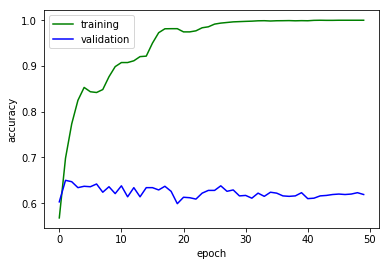

In [38]:
import matplotlib.pyplot as plt  
import matplotlib.image as Image
plt.plot(training2_accuracy, color='g',label='training');
plt.plot(validation2_accuracy, color='b',label='validation');
plt.xlabel("epoch");
plt.ylabel("accuracy");
plt.legend();
plt.savefig('accuracy_plot_flair_sigmoid_FINAL.png') ;  # plot between training and validation

In [39]:
# conclusion for sigmoid siamese lstm


Data-------------------------------Quora Question Pairs Dataset
Total Data Considered--------------10000

======================================
After Spiliting
Total Training Data Considered ----9000
Total validation Data Considered---1000 



======================================


#Architecture Considered   
-------SIAMESE NEURAL NETWORK WITH LSTM ARCHITECTURE
------- 1024 units for lstm output
-------hidden layer having number of outputs as 50


==========================================

Distance ---------------------------Manhattan Distance
#Loss function----------------------Mean Square Error
#Activation Function ---------------Sigmoid
#Optimizer -------------------------Adam Optimizer

#EPOCH COUNT -----------------------50
#BATCH SIZE  -----------------------200 FOR TRAINING
#BATCH SIZE  -----------------------1000 FOR VALIDATION








### expermenting with tanh layer

In [ ]:
with tf.variable_scope('one'):
    lstm = tf.nn.rnn_cell.LSTMCell(num_of_units)   # pass the number of lstm units 
    output1,state = tf.nn.dynamic_rnn(lstm,input_data1,dtype=tf.float32)   # output of each cell and previous state will be returned
    output1_ = output1[:,-1]
with tf.variable_scope('two'):
    lstm2 = tf.nn.rnn_cell.LSTMCell(num_of_units)
    output2,state = tf.nn.dynamic_rnn(lstm2,input_data2,dtype=tf.float32)   # output of each cell and previous state will be returned
    output2_ = output2[:,-1]

hid1 = tf.contrib.layers.fully_connected(output1_, num_outputs = 50, activation_fn=tf.tanh)
hid2= tf.contrib.layers.fully_connected(output2_, num_outputs = 50, activation_fn=tf.tanh)
predictions =  tf.math.exp(-tf.reduce_sum(tf.abs(tf.subtract(hid1, hid2)),axis=1))
#predictions =  tf.math.exp(-tf.reduce_sum(tf.abs(tf.subtract(output1_, output2_)),axis=1))
loss = tf.losses.mean_squared_error(label, predictions)
optimizer = tf.train.AdamOptimizer(0.001).minimize(loss)
correct_pred = tf.equal(tf.cast(tf.round(predictions), tf.float32), label)
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))
    


In [ ]:
training2_accuracy = []
validation2_accuracy= []
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    sess.run(tf.local_variables_initializer())
    for m in range(50):
        print("epoch:",m,end=" ") 
        epoch_accuracy = 0.0
        batch_counter = 0
        for x1,x2,y in batch(X_train.iloc[:]['que1_word_embeddings'],X_train.iloc[:]['que2_word_embeddings'],Y_train.iloc[:],50):
            
            tens_res = sess.run([predictions,label,loss,optimizer,correct_pred,accuracy],feed_dict={input_data1:x1,input_data2:x2,label:y})
            epoch_accuracy += (tens_res[-1])
            batch_counter += 1
            
        accu_ = float(epoch_accuracy)/float(batch_counter)
        print("epoch_accuracy :: ",accu_)
        training2_accuracy.append(accu_)
        
        
        
        for x1,x2,y in batch(X_validation.iloc[:]['que1_word_embeddings'],X_validation.iloc[:]['que2_word_embeddings'],Y_validation.iloc[:],1000):
            tens_res = sess.run([predictions,label,loss,optimizer,correct_pred,accuracy],feed_dict={input_data1:x1,input_data2:x2,label:y})
            valid_acc=tens_res[-1]
            print("validation_accuracy",tens_res[-1])
            validation2_accuracy.append(valid_acc)
        
        
        

In [ ]:
import matplotlib.pyplot as plt  
import matplotlib.image as Image
plt.plot(training2_accuracy, color='g',label='training')
plt.plot(validation2_accuracy, color='b',label='validation')
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend()
plt.savefig('accuracy_plot_flair_additional_layer_tanh.png') 

In [ ]:
train.to_csv("training_flair_embeddings.csv",index=False)